# FFT analysis on the dataset

**Author:** Morten Opprud - Jan 29, 2017

## Dataset background

In this notebook we work with Dataset No. 1:

- Recording Duration: October 22, 2003 12:06:24 to November 25, 2003 23:39:56
- No. of Files: 2,156
- No. of Channels: 8
- Channel Arrangement: 
 - Bearing 1 – Ch 1&2; 
 - Bearing 2 – Ch 3&4;
 - Bearing 3 – Ch 5&6; 
 - Bearing 4 – Ch 7&8.
 
- File Recording Interval: Every 10 minutes (except the first 43 files were taken every 5 minutes)
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.
- Each data set consists of individual files that are 1-second vibration signal snapshots recorded at specific intervals. Each file consists of 20,480 points with the sampling rate set at 20 kHz

## Reading a dataset

Read first tab separated dataset into a **panda**, named **samples**, using *read_table* function, *sep* indicates the data field separator, in this case **tab** *\t*. 

*Names* defines the headings for each *data column* in the dataset

In the end we extract data from the pandas into numpy arrays, to be able to perform FFT. 

This is done using **samplesB1_start.iloc[0:,0].values**

In [11]:
%%bash

ls ../../data/1st_test

2003.10.22.12.06.24
2003.10.22.12.06.24.csv
2003.10.22.12.09.13
2003.10.22.12.14.13
2003.10.22.12.19.13
2003.10.22.12.24.13
2003.10.22.12.29.13
2003.10.22.12.34.13
2003.10.22.12.39.13
2003.10.22.12.44.13
2003.10.22.12.49.13
2003.10.22.12.54.13
2003.10.22.12.59.13
2003.10.22.13.04.13
2003.10.22.13.09.13
2003.10.22.13.14.13
2003.10.22.13.19.13
2003.10.22.13.24.13
2003.10.22.13.29.13
2003.10.22.13.34.13
2003.10.22.13.39.13
2003.10.22.13.44.13
2003.10.22.13.49.13
2003.10.22.13.54.13
2003.10.22.13.59.13
2003.10.22.14.04.13
2003.10.22.14.09.13
2003.10.22.14.14.13
2003.10.22.14.19.13
2003.10.22.14.24.13
2003.10.22.14.29.13
2003.10.22.14.34.13
2003.10.22.14.39.13
2003.10.22.14.44.13
2003.10.22.14.49.13
2003.10.22.14.54.13
2003.10.22.14.59.13
2003.10.22.15.04.13
2003.10.22.15.09.13
2003.10.22.15.14.13
2003.10.22.15.19.13
2003.10.22.15.24.13
2003.10.22.15.29.13
2003.10.22.15.37.48
2003.10.22.15.44.13
2003.10.22.15.54.13
2003.10.22.16.04.13
2003.10.22.16.14.13
2003.10.22.16.24.13
2003.10.22.16.34

In [13]:
%matplotlib inline   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

samplesB3_start = pd.read_table('../../data/1st_test/2003.10.22.12.06.24',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
                         usecols = ["Bearing 3.1"])
#                         usecols = ["Bearing 3.1", "Bearing 3.2"])

samplesB4_start = pd.read_table('../../data/1st_test/2003.10.22.12.06.24',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
                         usecols = ["Bearing 4.1"])

samplesB3_end = pd.read_table('../../data/1st_test/2003.11.14.15.22.17',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
                         usecols = ["Bearing 3.1"])
#                         usecols = ["Bearing 3.1", "Bearing 3.2"])

samplesB4_end = pd.read_table('../../data/1st_test/2003.11.14.15.22.17',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
                         usecols = ["Bearing 4.1"])
#                         usecols = ["Bearing 3.1", "Bearing 3.2"])

# convert data to float
y1 = samplesB3_start.iloc[0:,0].values
y2 = samplesB3_end.iloc[0:,0].values
#print y1
print y1.size
print y1.shape
print y2.shape

20480
(20480,)
(20480,)


## prepare data for FFT

Below is an example of using numpy's FFT that does following
- Specifies the sampling frequency **Fs**
- Defines the data buffer length **N**
- Defines the FFT length **Nfft**, wich is half of **N**, due to FFT symmetry, and *Nyquist*
- generates a numpy **f** array, with evenly spaced numbers over a specified interval, from **0** to **N**.
- generates a numpy **f** array, with evenly spaced numbers over a specified interval, from **0** to **Nfft**
- generates a numpy **w** array, with **Hanning window**, of length **N**
- mulitplies the Hanning windiw **w** onto the sample buffers **y1** and **y2**



In [14]:
# sample frequency
Fs = 20000

N = y1.size
Nfft = N/2
#N = 4096

x = np.linspace(0.0, N, N) #num=400
f = np.linspace(0.0, Fs/2, N)
xf = np.linspace(0.0,Fs/2,Nfft)
w = np.hanning(N)

y1w = y1*w
y2w = y2*w

print array dimensions, for debug

In [ ]:
#print y1[0:]
print y1.shape
print w.shape
print y1w.shape

## Plot the samples and window function

Show the effect of the hanning window, on the samples. The window is used to avoid discontiniuties in the ends, and minimise FFt leakage, see https://en.wikipedia.org/wiki/Window_function

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


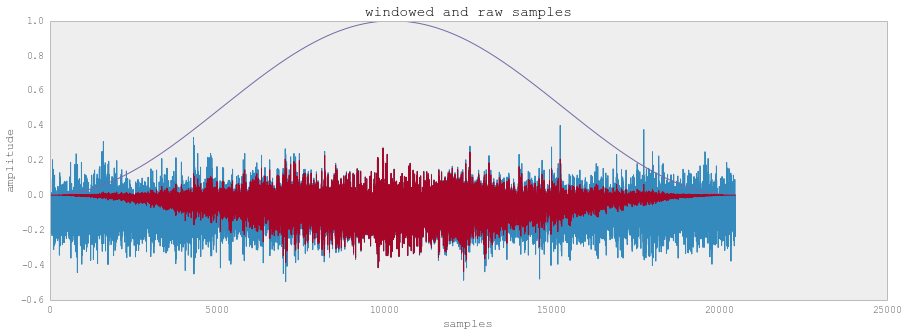

In [15]:


plt.plot(x,y1)
plt.plot(x,w)
plt.plot(x,y1w)

plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('windowed and raw samples')
plt.grid()
plt.legend(loc=0)
plt.show()

## FFT and FFT visualization

now perform and plot the FFT

- performs FFT on the windowed samples **y1w** array and stores the result in **y1f**
- performs FFT on the windowed samples **y2w** array and stores the result in **y2f**
- generates a numpy **xf** array, with evenly spaced numbers over a specified interval.
- plot **x - y**
- plot **xf - y1f**
- plot **xf - y2f**


In [16]:
#y1f = abs(np.fft.fft(y1w,Nfft))
#y2f = abs(np.fft.fft(y2w,Nfft))
y1f = abs(np.fft.fft(y1w,N))
y2f = abs(np.fft.fft(y2w,N))


print y1f.shape
print y2f.shape
print xf.shape

(20480,)
(20480,)
(10240,)


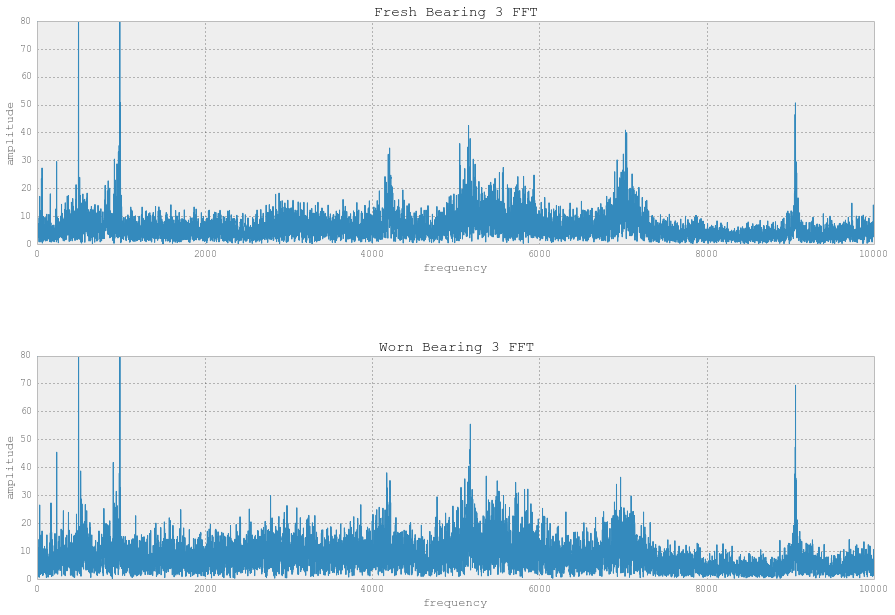

In [17]:
y1f = abs(np.fft.fft(y1w,N))
y2f = abs(np.fft.fft(y2w,N))

#y1f = abs(np.fft.fft(y1w,N))
plt.rcParams['figure.figsize'] = (15, 10)

# fresh bearing plot
plt.subplot(2, 1, 1)
plt.plot(xf,y1f[0:Nfft])
plt.ylim(0,80)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Fresh Bearing 3 FFT')
plt.grid(1)

#worn bearing plot
plt.subplot(2, 1, 2)
plt.plot(xf,y2f[0:Nfft])
plt.ylim(0,80)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Worn Bearing 3 FFT')
plt.grid(1)
plt.show()


We can see a difference in the FFT's, but we might want to zoom in around the bearing frequencies, we found in the [Bearing data] notebook.
 - fI (Hz): 296.9
 - fO (Hz): 236.4
 - fb (Hz): 139.9
 - fc (Hz): 29.55

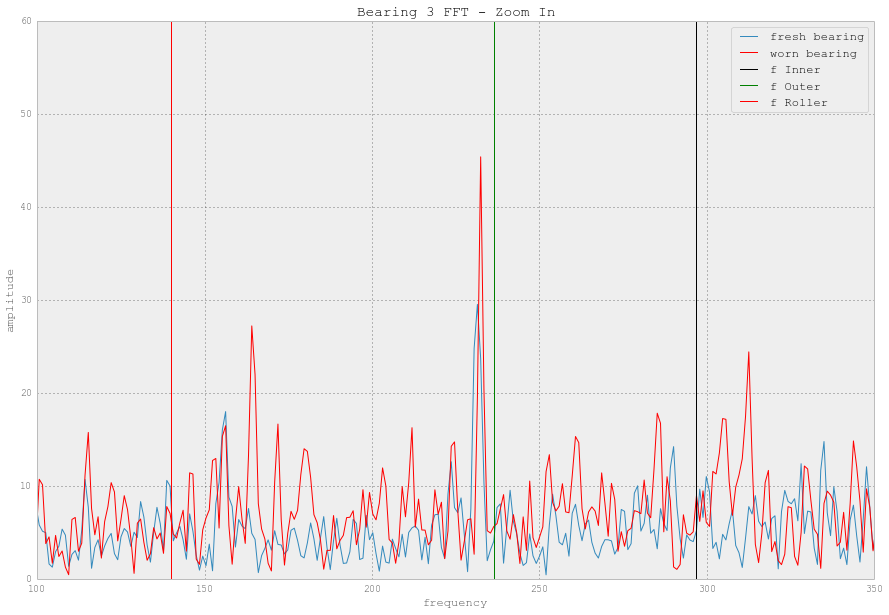

In [20]:
#bearing frequencies
fi = 296.9
fo = 236.4
fb = 139.9

# fresh bearing plot
plt.plot(xf,y1f[0:Nfft],label='fresh bearing')
#worn bearing plot
plt.plot(xf,y2f[0:Nfft],label='worn bearing', color = 'r')
plt.axvline(x=fi,label='f Inner',color='k')
plt.axvline(x=fo,label='f Outer',color='g')
plt.axvline(x=fb,label='f Roller',color='r')
plt.ylim(0,60)
plt.xlim(100,350)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Bearing 3 FFT - Zoom In')
plt.legend()
plt.grid(1)
plt.show()

In [ ]:
dd

## Combine the functions

Add FFT funtions in one window, and analyze bearing 4

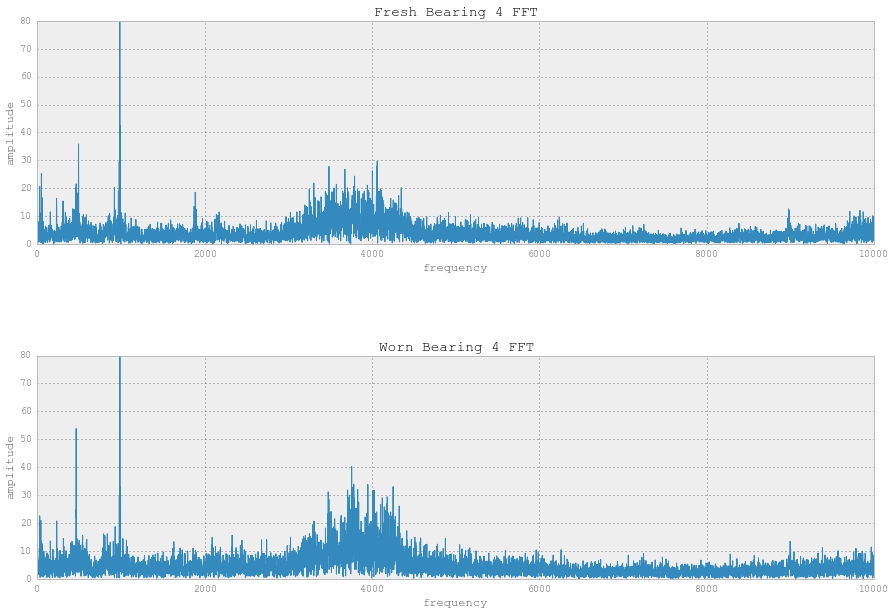

In [21]:
Fs = 20000
N = y1.size
Nfft = N/2

#bearing frequencies
fi = 296.9
fo = 236.4
fb = 139.9


#x = np.linspace(0.0, N, N) #num=400
#f = np.linspace(0.0, Fs/2, N)
#xf = np.linspace(0.0,Fs/2,Nfft)
#w = np.hanning(N)

b1 = samplesB4_start.iloc[0:,0].values
b2 = samplesB4_end.iloc[0:,0].values

yb1w = b1*w
yb2w = b2*w

yb1f = abs(np.fft.fft(yb1w,N))
yb2f = abs(np.fft.fft(yb2w,N))

#y1f = abs(np.fft.fft(y1w,N))
plt.rcParams['figure.figsize'] = (15, 10)

# fresh bearing plot
plt.subplot(2, 1, 1)
plt.plot(xf,yb1f[0:Nfft])
plt.ylim(0,80)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Fresh Bearing 4 FFT')
plt.grid(1)

#worn bearing plot
plt.subplot(2, 1, 2)
plt.plot(xf,yb2f[0:Nfft])
plt.ylim(0,80)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Worn Bearing 4 FFT')
plt.grid(1)
plt.show()






#plt.axvline(x=fi,label='f Inner',color='k')
#plt.axvline(x=fo,label='f Outer',color='g')
#plt.axvline(x=fb,label='f Roller',color='r')



## An fft funtion, cable of reading from a file

Build a small module cabale of reading a file and returning an FFT. 

The samples read from the file will be windowed using a Hanning window

In [22]:

def fileFFT(filename, cols):
    #read file
    samples =pd.read_table(filename,
                          sep='\t',
                          names = ["1","2","3","4","5","6","7","8"],
                          usecols = [cols])
    #extract samples as float values into numpy array, suited for FFT & size
    y = samples.iloc[0:,0].values
    N = y.size
    #calculate fft length
    global Nfft
    Nfft = N/2
    #window to avoid spectral leakage, mulitplied onto samples
    w = np.hanning(N)
    yw = y*w
    #do FFT
    yf = abs(np.fft.fft(yw,N))
    
    return yf[0:Nfft] #return half the spectrum, since the other half is mirrored


Also, we want a simple plotting function

In [24]:

def plotFFT(label, yf, ypos):
    plt.subplot(noOfFFT, 1, ypos)
    plt.plot(xf,yf[0:Nfft])
    plt.ylim(0,80)
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.title(label)
    plt.grid(1)

### Test plotting a number of file-FFT's'

A test script is made, capable of, 
- setting up the plot
- setup the column to use in the FFT
- read filenames into a list
- specify the number of FFT's requested
- call the FFT function
- plot the data, in adjecant plot windows


['../../data/1st_test/2003.10.22.12.06.24.csv', '../../data/1st_test/2003.10.22.12.09.13', '../../data/1st_test/2003.10.22.12.14.13', '../../data/1st_test/2003.10.22.12.19.13', '../../data/1st_test/2003.10.22.12.24.13', '../../data/1st_test/2003.10.22.12.29.13', '../../data/1st_test/2003.10.22.12.34.13', '../../data/1st_test/2003.10.22.12.39.13', '../../data/1st_test/2003.10.22.12.44.13', '../../data/1st_test/2003.10.22.12.49.13', '../../data/1st_test/2003.10.22.12.54.13', '../../data/1st_test/2003.10.22.12.59.13', '../../data/1st_test/2003.10.22.13.04.13', '../../data/1st_test/2003.10.22.13.09.13', '../../data/1st_test/2003.10.22.13.14.13', '../../data/1st_test/2003.10.22.13.19.13', '../../data/1st_test/2003.10.22.13.24.13', '../../data/1st_test/2003.10.22.13.29.13', '../../data/1st_test/2003.10.22.13.34.13', '../../data/1st_test/2003.10.22.13.39.13', '../../data/1st_test/2003.10.22.13.44.13', '../../data/1st_test/2003.10.22.13.49.13', '../../data/1st_test/2003.10.22.13.54.13', '../..

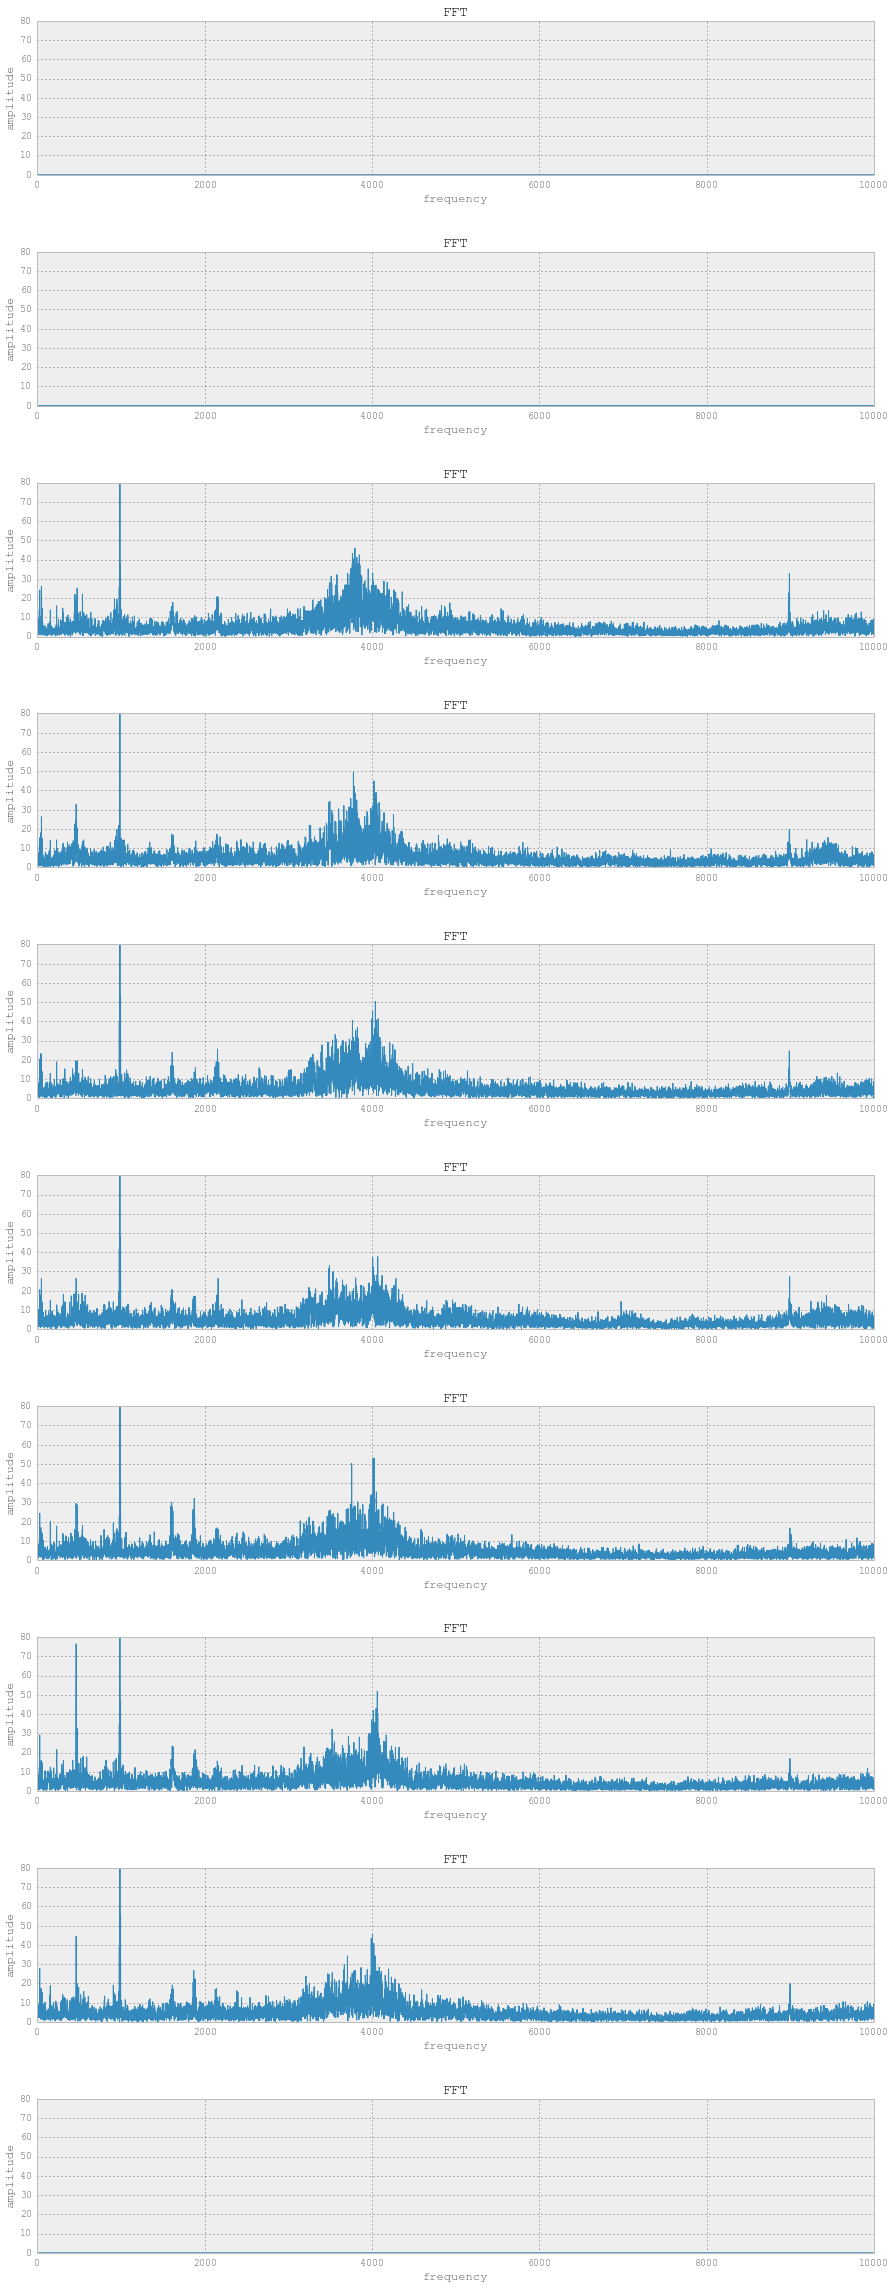

In [27]:
%matplotlib inline   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 40)

#sample freq
Fs = 20000

#data columns to use in dataset
col = '7'

# file index'es
firstFileIndex = 1
lastFileIndex = 922

#How many FFT's we want, acros the bearings lifetime
global noOfFFT 
noOfFFT = 10

#noOfFFT= lastFileIndex-firstFileIndex
fftDistance = 90 # gives us 0..900

N=20480

y = np.zeros((noOfFFT,Nfft))

# get data file names
path =r'../../data/1st_test/'
filenames = glob.glob(path + "/*.*")

print filenames[firstFileIndex:lastFileIndex]


index = 0
fileIndex = 0
#while index < (lastFileIndex-firstFileIndex):
while index < (noOfFFT):
    print(index, filenames[fileIndex] + '\n')
    #y[index] = fileFFT(filenames[index],col)
    y[index] = fileFFT(filenames[fileIndex],col)
    y[0:3]=0 #zero DC component
    y[1000:1020]=0 # zero out big stationary pulse
 
    xf = np.linspace(0.0,Fs/2,Nfft)
    plotFFT('FFT',y[index], index)
    fileIndex += fftDistance
    index += 1
    


## meet plotly...

Interactive plotting, that allows us to zoom in on data of interest

- you need to sign up for a free acount at https://plot.ly/, 
- grab your username and api_key

In [31]:
import plotly 
plotly.tools.set_credentials_file(username='opprud', api_key='<api key>')


In [32]:
#pull the last FFT into a plotly graph
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = xf,
    y = y[7]
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-line')


## Plot samples in a 3D grid


Use plotly's 3D graphing functions, to plot a 3D FFT plot.

Takes a little while due to data up/download from the plotly server

In [33]:
y = np.swapaxes(y,0,1)

data = [
    go.Surface(
#        z=z_data.as_matrix()
        #z = samples.as_matrix()
        z=np.asmatrix(y[0:Nfft])
    )
]
layout = go.Layout(
    title='FFT on bearing 4',
    autosize=False,
    width=800,
    height=600,
#    margin=dict(
#        l=65,
#        r=50,
#        b=65,
#        t=90
#    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='FFT on column 7')


### Can we see the damaged roller element ?

the above plot, reads data from column 7, that is mounted on bearing 4, with a damaged roller 

# Looking at a damaged inner Race - bearing 3

Now we try the same analysis, and 3 D plot for bearing 3

In [34]:
#data columns to use in dataset
col = '5'# bearing 3

noOfFFT = 30
fftDistance = 30 # gives us 0..900

y2 = np.zeros((noOfFFT,Nfft))

index = 0
fileIndex = 0
#while index < (lastFileIndex-firstFileIndex):
while index < (noOfFFT):
    print(index, filenames[fileIndex] + '\n')
    #y[index] = fileFFT(filenames[index],col)
    y2[index] = fileFFT(filenames[fileIndex],col)
#    y[0:3]=0 #zero DC component
#    y[1000:1020]=0 # zero out big stationary pulse
    xf = np.linspace(0.0,Fs/2,Nfft)
#    plotFFT('FFT',y[index], index)
    fileIndex += fftDistance
    index += 1

(0, '../../data/1st_test/2003.10.22.12.06.24\n')
(1, '../../data/1st_test/2003.10.22.14.29.13\n')
(2, '../../data/1st_test/2003.10.22.18.14.13\n')
(3, '../../data/1st_test/2003.10.22.23.14.13\n')
(4, '../../data/1st_test/2003.10.23.04.14.13\n')
(5, '../../data/1st_test/2003.10.23.09.14.13\n')
(6, '../../data/1st_test/2003.10.29.18.29.46\n')
(7, '../../data/1st_test/2003.10.29.23.29.46\n')
(8, '../../data/1st_test/2003.10.31.00.49.46\n')
(9, '../../data/1st_test/2003.10.31.05.49.46\n')
(10, '../../data/1st_test/2003.10.31.12.31.44\n')
(11, '../../data/1st_test/2003.10.31.17.31.44\n')
(12, '../../data/1st_test/2003.10.31.22.31.44\n')
(13, '../../data/1st_test/2003.11.01.03.31.44\n')
(14, '../../data/1st_test/2003.11.01.08.31.44\n')
(15, '../../data/1st_test/2003.11.01.13.31.44\n')
(16, '../../data/1st_test/2003.11.01.18.31.44\n')
(17, '../../data/1st_test/2003.11.01.23.31.44\n')
(18, '../../data/1st_test/2003.11.03.14.21.44\n')
(19, '../../data/1st_test/2003.11.07.19.41.44\n')
(20, '../.

In [35]:
y2 = np.swapaxes(y2,0,1)

data = [
    go.Surface(
        z=np.asmatrix(y2[0:Nfft])
    )
]
layout = go.Layout(
    title='FFT on bearing 3',
    autosize=False,
    width=800,
    height=600,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='FFT on column 5')


Since the bearing frequencies are less that 300 hz, we zoom into this range 
bearing frequencies :
- fi = 296.9 Hz
- fo = 236.4 Hz
- fb = 139.9 Hz


In [36]:
#data columns to use in dataset
col = '5'# bearing 3

#increase the number of FFT's
noOfFFT = 300
fftDistance = 3 # gives us 0..900

nn=800

y_zoom = np.zeros((noOfFFT,nn))


def fileFFT2(filename, cols):
    #read file
    samples =pd.read_table(filename,
                          sep='\t',
                          names = ["1","2","3","4","5","6","7","8"],
                          usecols = [cols])
    #extract samples as float values into numpy array, suited for FFT & size
    y = samples.iloc[0:,0].values
    N = y.size
    #calculate fft length
    global Nfft
    Nfft = N/2
    #window to avoid spectral leakage, mulitplied onto samples
    w = np.hanning(N)
    yw = y*w
    #do FFT
    yf = abs(np.fft.fft(yw,N))
    
    return yf[0:nn] #return half the spectrum, since the other half is mirrored






index = 0
fileIndex = 0
#while index < (lastFileIndex-firstFileIndex):
while index < (noOfFFT):
    print(index, filenames[fileIndex] + '\n')
    #y[index] = fileFFT(filenames[index],col)
    y_zoom[index] = fileFFT2(filenames[fileIndex],col)
    y_zoom[index][0]=0 #zero DC component
    y_zoom[index][1]=0 #zero DC component
    y_zoom[index][2]=0 #zero DC component
    y_zoom[index][3]=0 #zero DC component

#    y[1000:1020]=0 # zero out big stationary pulse
    xf = np.linspace(0.0,nn/2,nn)
#    plotFFT('FFT',y[index], index)
    fileIndex += fftDistance
    index += 1

(0, '../../data/1st_test/2003.10.22.12.06.24\n')
(1, '../../data/1st_test/2003.10.22.12.14.13\n')
(2, '../../data/1st_test/2003.10.22.12.29.13\n')
(3, '../../data/1st_test/2003.10.22.12.44.13\n')
(4, '../../data/1st_test/2003.10.22.12.59.13\n')
(5, '../../data/1st_test/2003.10.22.13.14.13\n')
(6, '../../data/1st_test/2003.10.22.13.29.13\n')
(7, '../../data/1st_test/2003.10.22.13.44.13\n')
(8, '../../data/1st_test/2003.10.22.13.59.13\n')
(9, '../../data/1st_test/2003.10.22.14.14.13\n')
(10, '../../data/1st_test/2003.10.22.14.29.13\n')
(11, '../../data/1st_test/2003.10.22.14.44.13\n')
(12, '../../data/1st_test/2003.10.22.14.59.13\n')
(13, '../../data/1st_test/2003.10.22.15.14.13\n')
(14, '../../data/1st_test/2003.10.22.15.29.13\n')
(15, '../../data/1st_test/2003.10.22.15.54.13\n')
(16, '../../data/1st_test/2003.10.22.16.24.13\n')
(17, '../../data/1st_test/2003.10.22.16.54.13\n')
(18, '../../data/1st_test/2003.10.22.17.19.38\n')
(19, '../../data/1st_test/2003.10.22.17.44.13\n')
(20, '../.

In [37]:
y_zoom = np.swapaxes(y_zoom,0,1)

data = [
    go.Surface(
        z=np.asmatrix(y_zoom[0:nn])
    )
]
layout = go.Layout(
    title='FFT on bearing 3',
    autosize=False,
    width=800,
    height=600,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='FFT on column 5')
